In [12]:
from netCDF4 import Dataset #Reading NetCDF files
import numpy as np
import xarray as xr
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import matplotlib.path as mpath
import matplotlib.pyplot as plt
from matplotlib import *
from pylab import *
import matplotlib.ticker as mticker
from IPython.display import display, clear_output

syear = input("Start Year: ")
eyear = input("End Year: ")

Start Year: 1987
End Year: 1989


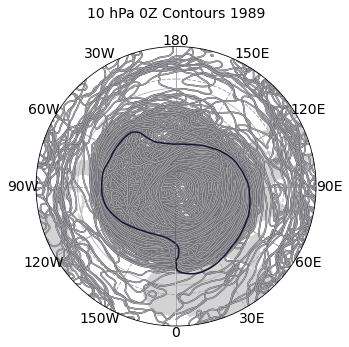

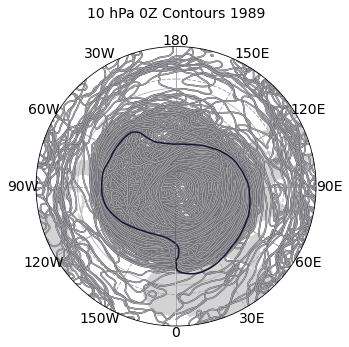

In [16]:
for i in range(int(syear),int(eyear)+1):
    ds = xr.open_dataset("/erai/"+str(i)+"/g."+str(i)+".nc",decode_times=False)
    attempt = [x for x in range(0,len(np.array(ds.isel(lev=31).g)),4)]

    fig = plt.figure(figsize=[10, 5])
    ax = plt.subplot(1, 1, 1, projection=ccrs.NorthPolarStereo())
    fig.subplots_adjust(bottom=0.05, top=0.95,
                        left=0.04, right=0.95, wspace=0.02)

    # Limit the map to 40 degrees latitude and below.
    ax.set_extent([-180, 180, 0, 40], ccrs.PlateCarree())

    ax.add_feature(cfeature.LAND,facecolor='lightgray')


    ax.gridlines()


    # Compute a circle in axes coordinates, which we can use as a boundary
    # for the map. We can pan/zoom as much as we like - the boundary will be
    # permanently circular.
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)

    ax.set_boundary(circle, transform=ax.transAxes)

    #from NCl, messing with grid lines to produce manipulated longitudes and latitudes
    gl = ax.gridlines(ccrs.PlateCarree(),
                      draw_labels=False,
                      linestyle="--",
                      linewidth=1,
                      color='darkgray',
                      zorder=2)
    gl.ylocator = mticker.FixedLocator(np.arange(0, 90, 15))
    gl.xlocator = mticker.FixedLocator(np.arange(-180, 180, 30))

    ticks = np.arange(0, 210, 30)
    etick = ['0'] + [
        r'%dE' % tick for tick in ticks if (tick != 0) & (tick != 180)
    ] + ['180']
    wtick = [r'%dW' % tick for tick in ticks if (tick != 0) & (tick != 180)]
    labels = etick + wtick
    xticks = np.arange(0, 360, 30)
    yticks = np.full_like(xticks, -5)  # Latitude where the labels will be drawn
    for xtick, ytick, label in zip(xticks, yticks, labels):
        if label == '180':
            ax.text(xtick,
                    ytick,
                    label,
                    fontsize=14,
                    horizontalalignment='center',
                    verticalalignment='top',
                    transform=ccrs.Geodetic())
        elif label == '0':
            ax.text(xtick,
                    ytick,
                    label,
                    fontsize=14,
                    horizontalalignment='center',
                    verticalalignment='bottom',
                    transform=ccrs.Geodetic())
        else:
            ax.text(xtick,
                    ytick,
                    label,
                    fontsize=14,
                    horizontalalignment='center',
                    verticalalignment='center',
                    transform=ccrs.Geodetic())
        
    plt.title("10 hPa 0Z Contours "+str(i),fontsize = 14, y=1.08)
    plt.tight_layout()
    avg = np.array(np.mean(ds.isel(lev=31).g))
    print(avg)

    lat = ds.lat
    lon = ds.lon
    plt.ion()
    ax.contour(lon,lat,ds.isel(time=attempt[0],lev=31).g,levels =[avg], transform=ccrs.PlateCarree(), colors=['#1B132E'])

    animate = lambda i: ax.contour(lon,lat,ds.isel(time=attempt[i],lev=31).g,levels =[avg], transform=ccrs.PlateCarree(), colors=['#1B132E'])
    animate2 = lambda i: ax.contour(lon,lat,ds.isel(time=attempt[i-1],lev=31).g,levels =[avg], transform=ccrs.PlateCarree(), colors=['#A0A0A0'])

#####################################
    #now, begin plotting data
    #start with the 0th time step
    
    
    for j in range(len(attempt)):
        if j == 0:
            animate(j)
            clear_output(wait=True)
            display(fig)
        if j > 0:
            animate2(j)
            animate(j)
            clear_output(wait=True)
            display(fig)
    plt.ioff()
    plt.show()
    
    name = '/home11/grad/2020/ef935217/Research/10hPa_map/Gif_Images/' + str(image_no) + '.png'
    plt.savefig(name)
    image_no += 1
    